In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df['Gender'] = lb.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [8]:
#drop unnecessary columns
df1 = df.drop(columns='CustomerID')

In [9]:
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


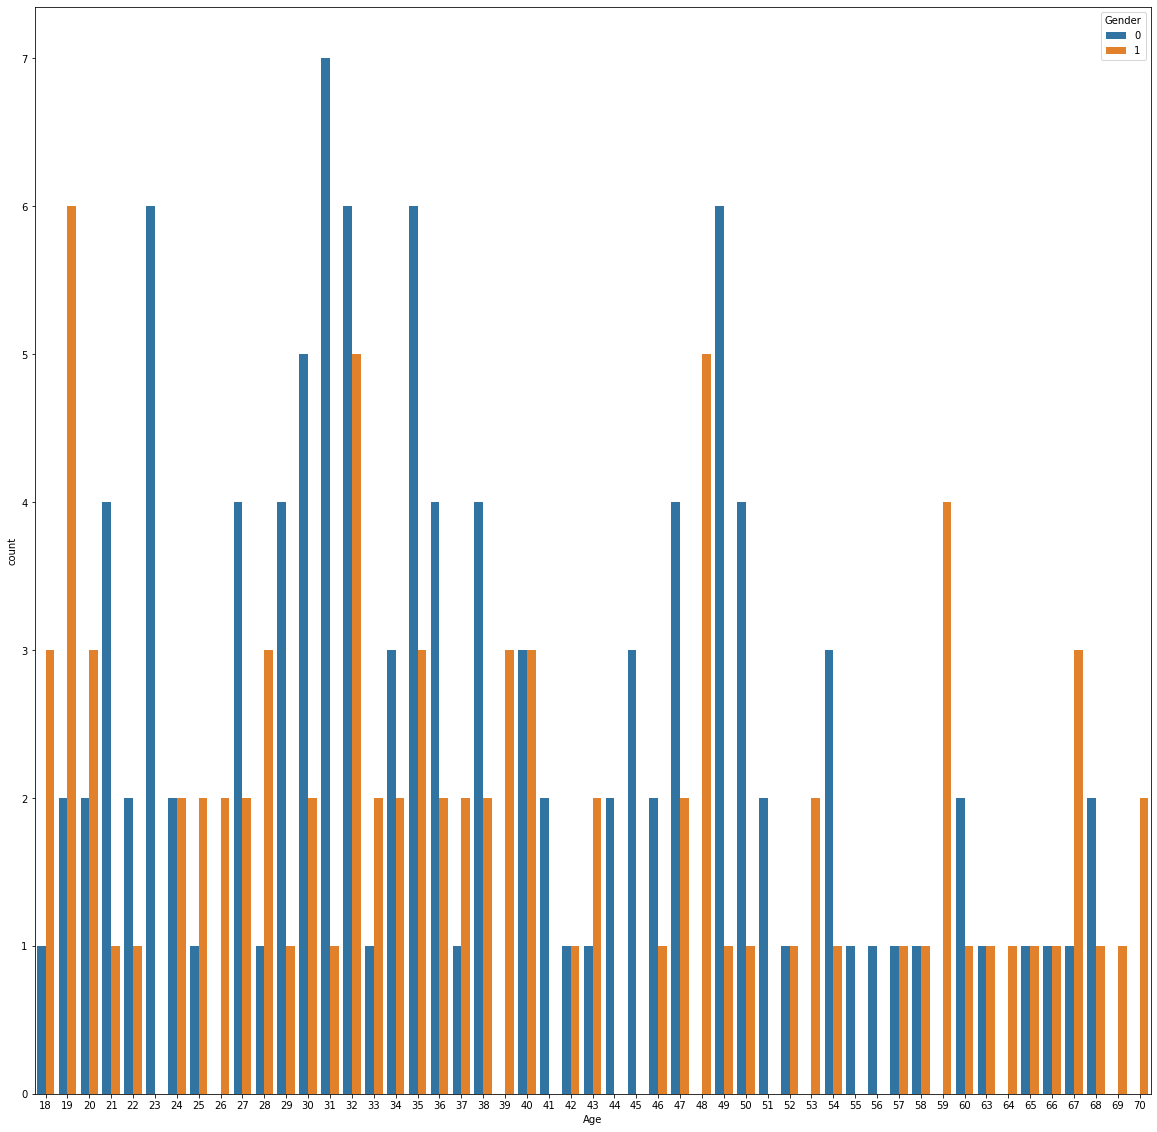

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.countplot(x=df1['Age'],data=df,hue='Gender')

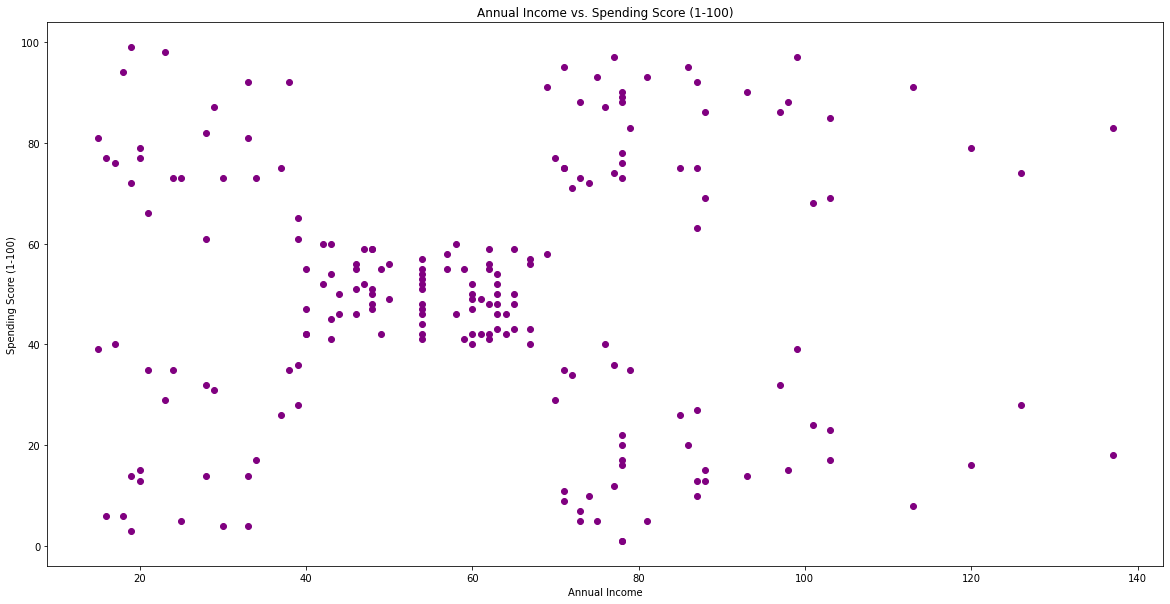

In [23]:
plt.figure(figsize=(20,10))
plt.scatter(x=df1['Annual Income (k$)'],y=df1['Spending Score (1-100)'],c='purple')
plt.title('Annual Income vs. Spending Score (1-100)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [39]:
def show_boxplot(df):
    plt.rcParams['figure.figsize']=[14,6]
    sns.boxplot(data=df,orient="v")
    plt.title("Outliers distribution",fontsize=16)
    plt.ylabel("Range",fontweight='bold')
    plt.xlabel("Attributes",fontweight='bold')

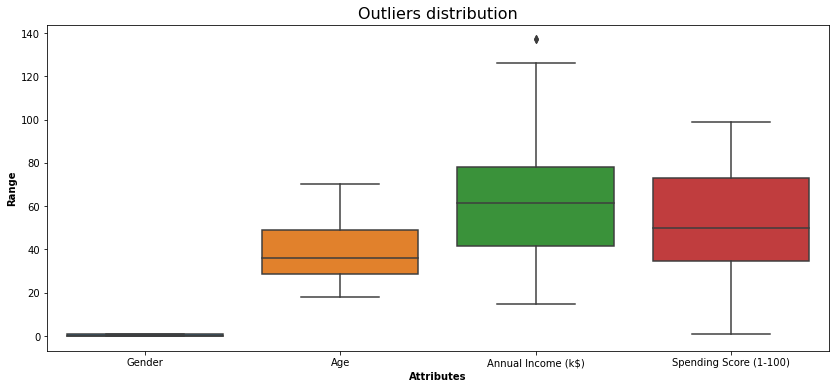

In [40]:
show_boxplot(df1)

In [50]:
def remove_outliers(data):
    df = data.copy()
    for col in list(df.columns):
          Q1 = df[str(col)].quantile(0.05)
          Q3 = df[str(col)].quantile(0.95)
          IQR = Q3 - Q1
          lower_bound = Q1 - 1.5*IQR
          upper_bound = Q3 + 1.5*IQR
          df = df[(df[str(col)] >= lower_bound) & (df[str(col)] <= upper_bound)]
    return df

In [54]:
w_df = remove_outliers(df1)

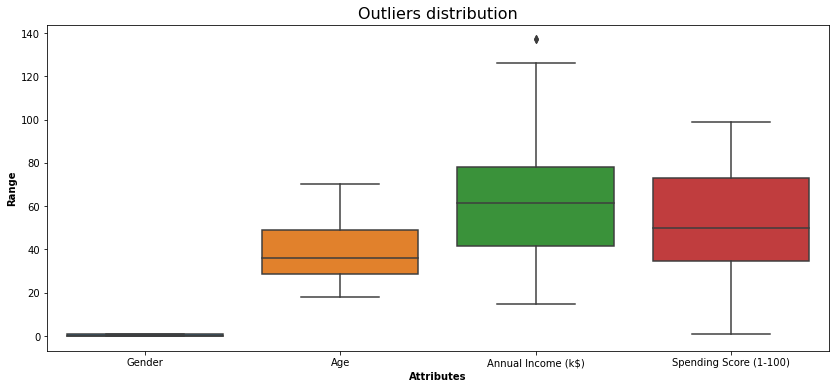

In [55]:
show_boxplot(w_df)

In [56]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scaled_data = scale.fit_transform(w_df)
scaled_data.shape

(200, 4)

In [57]:
from scipy.cluster.hierarchy import linkage, dendrogram

complete_clustering = linkage(scaled_data, method="complete", metric="euclidean")
average_clustering = linkage(scaled_data, method="average", metric="euclidean")
single_clustering = linkage(scaled_data, method="single", metric="euclidean")

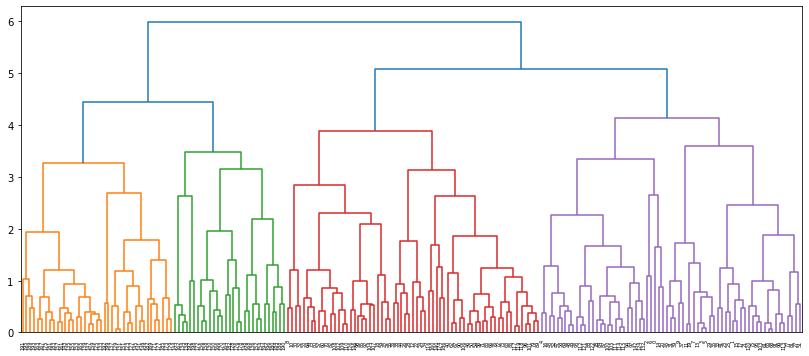

In [59]:
dendrogram(complete_clustering)
plt.show()

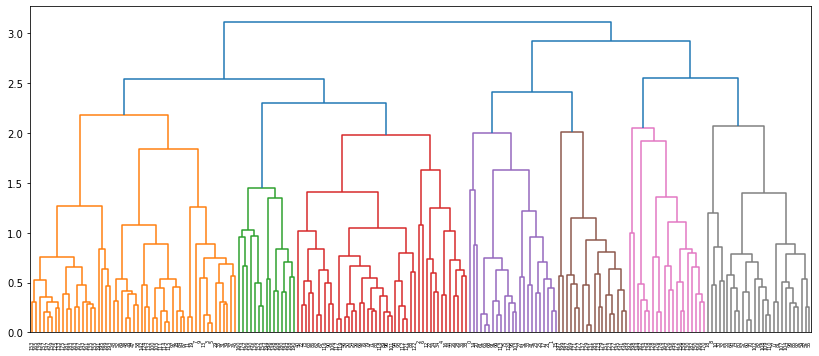

In [61]:
dendrogram(average_clustering)
plt.show()

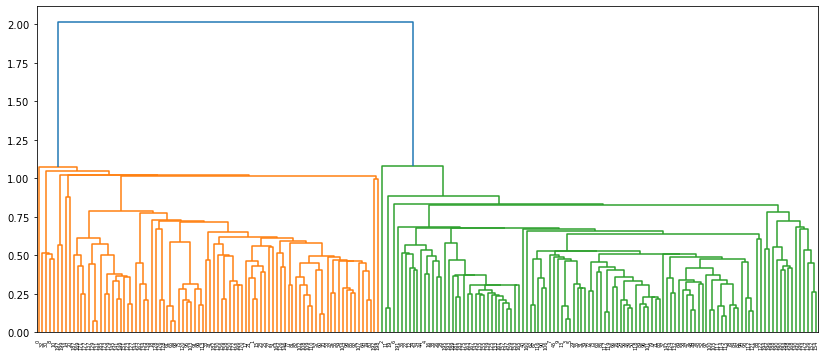

In [60]:
dendrogram(single_clustering)
plt.show()